<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing all the necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = 'darkgrid')
plt.style.use('seaborn-pastel')

<ipython-input-2-88ff570e2e2d>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-pastel')


In [3]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('WATCHLIST.xlsx')
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,2021-06-29,The Bonfire of the Vanities,movie,5.6,125,1990,"Comedy, Drama, Romance",26747,1990-12-21 00:00:00,Brian De Palma
1,2021-07-19,Milk,movie,7.5,128,2008,"Biography, Drama, History",179869,2008-10-28 00:00:00,Gus Van Sant
2,2022-08-25,DuckTales the Movie: Treasure of the Lost Lamp,movie,6.8,74,1990,"Animation, Adventure, Comedy, Family, Fantasy",28681,1990-08-03 00:00:00,Bob Hathcock
3,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos
4,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro
5,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5818,1996-08-14 00:00:00,Fraser C. Heston
6,2021-07-17,The AristoCats,movie,7.1,78,1970,"Animation, Adventure, Comedy, Family, Musical",114765,1970-12-11 00:00:00,Wolfgang Reitherman
7,2020-05-14,Lady in the Water,movie,5.5,110,2006,"Drama, Fantasy, Mystery, Thriller",103799,2006-07-17 00:00:00,M. Night Shyamalan
8,2020-05-15,The Rescuers,movie,6.9,77,1977,"Animation, Adventure, Comedy, Family, Fantasy",69926,1977-06-19 00:00:00,"Art Stevens, Wolfgang Reitherman, John Lounsbery"
9,2020-05-15,The Rescuers Down Under,movie,6.8,77,1990,"Animation, Adventure, Comedy, Family, Fantasy",47279,1990-11-16 00:00:00,"Mike Gabriel, Hendel Butoy"


In [4]:
# Displaying the number of rows and columns in the dataset:
df.shape

(796, 10)

In [5]:
# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         796 non-null    datetime64[ns]
 1   Title           796 non-null    object        
 2   Title Type      796 non-null    object        
 3   IMDb Rating     796 non-null    float64       
 4   Runtime (mins)  796 non-null    int64         
 5   Year            796 non-null    int64         
 6   Genres          796 non-null    object        
 7   Num Votes       796 non-null    int64         
 8   Release Date    796 non-null    object        
 9   Directors       792 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 62.3+ KB


In [6]:
df.describe()

,Created,IMDb Rating,Runtime (mins),Year,Num Votes
count,796,796.000000,796.000000,796.000000,7.960000e+02
mean,2022-06-26 15:35:16.582914560,6.671734,114.031407,1989.971106,8.417255e+04
min,2020-04-29 00:00:00,4.500000,71.000000,1927.000000,1.090000e+02
25%,2021-10-17 00:00:00,6.200000,100.000000,1982.000000,6.041500e+03
50%,2022-04-15 00:00:00,6.700000,109.500000,1992.000000,2.462200e+04
75%,2023-02-03 00:00:00,7.200000,122.000000,2000.000000,7.929350e+04
max,2024-05-14 00:00:00,9.000000,317.000000,2023.000000,2.871665e+06
std,NaN,0.770244,25.006872,15.979560,1.961061e+05


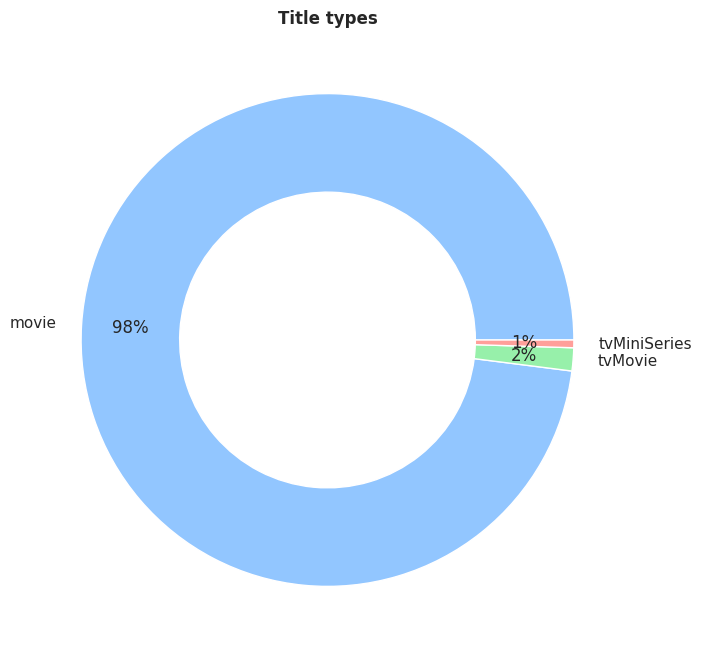

In [7]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [8]:
# Creating a datetime object based on the dates from the dataset:
df['Created'] = df['Created'].map(pd.to_datetime)
df['Day Created'] = df['Created'].apply(lambda x : x.day)
df['Month Created'] = df['Created'].apply(lambda x : x.month)
df['Year Created'] = df['Created'].apply(lambda x : x.year)
df['Weekday Created'] = df['Created'].apply(lambda x : x.weekday())

# Displaying the datatypes of each column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Created          796 non-null    datetime64[ns]
 1   Title            796 non-null    object        
 2   Title Type       796 non-null    object        
 3   IMDb Rating      796 non-null    float64       
 4   Runtime (mins)   796 non-null    int64         
 5   Year             796 non-null    int64         
 6   Genres           796 non-null    object        
 7   Num Votes        796 non-null    int64         
 8   Release Date     796 non-null    object        
 9   Directors        792 non-null    object        
 10  Day Created      796 non-null    int64         
 11  Month Created    796 non-null    int64         
 12  Year Created     796 non-null    int64         
 13  Weekday Created  796 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(7)

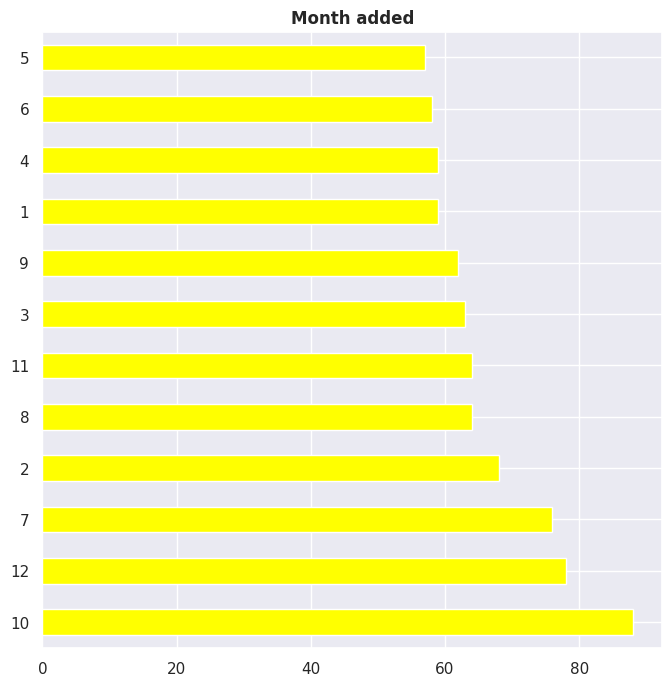

In [9]:
# Displaying distibution of months in which movies were added to the dataset:
df['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Month added', fontweight = 'bold')
plt.show()

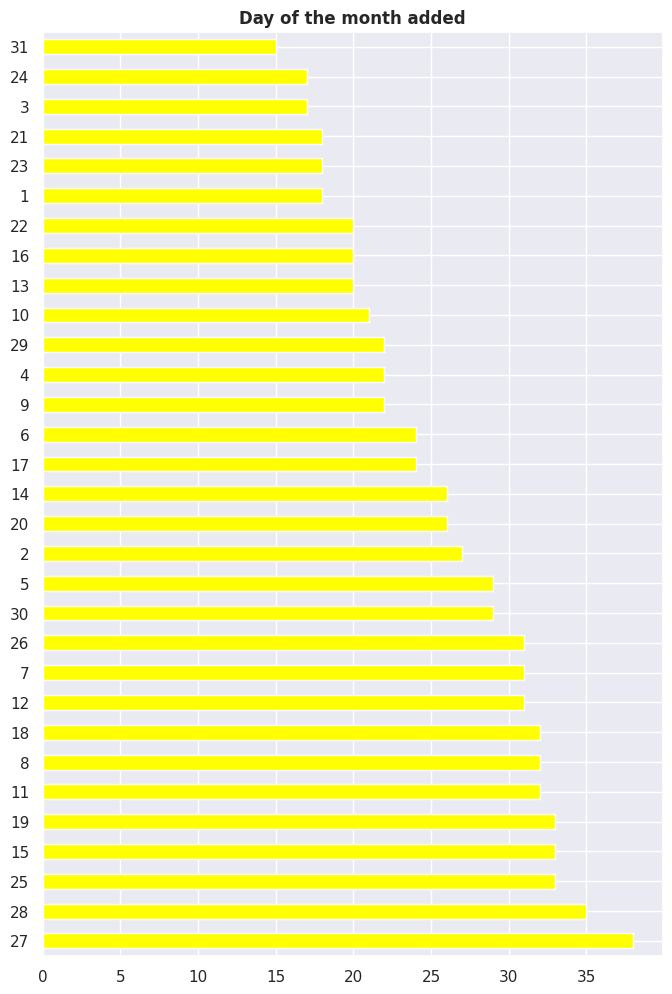

In [10]:
# Displaying distibution of days in which movies were added to the dataset:
df['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 12))
plt.ylabel(None)
plt.title('Day of the month added', fontweight = 'bold')
plt.show()

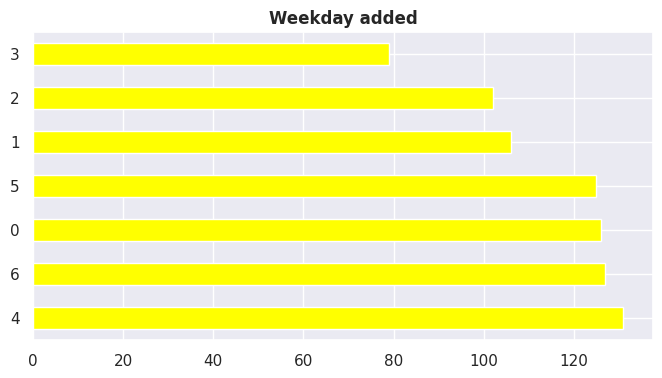

In [11]:
# Displaying distibution of weekdays in which movies were added to the dataset:
df['Weekday Created'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Weekday added', fontweight = 'bold')
plt.show()

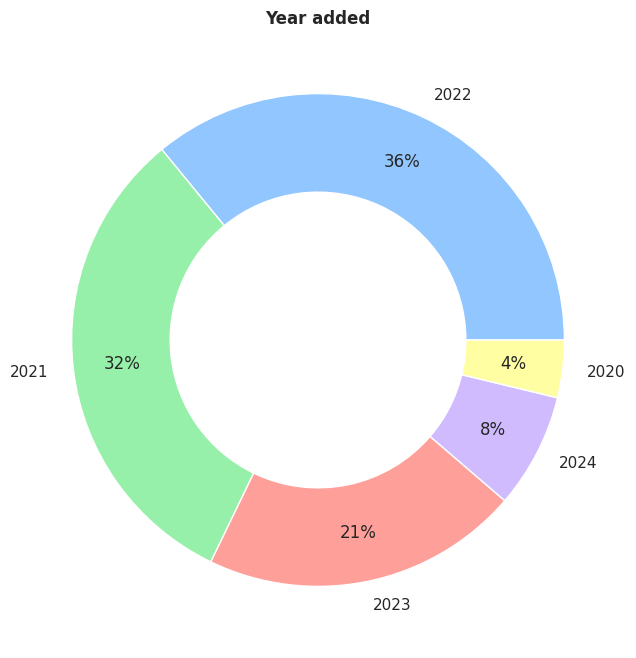

In [12]:
# Displaying distibution of years in which movies were added to the dataset:
df['Year Created'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year added', fontweight = 'bold')
plt.show()

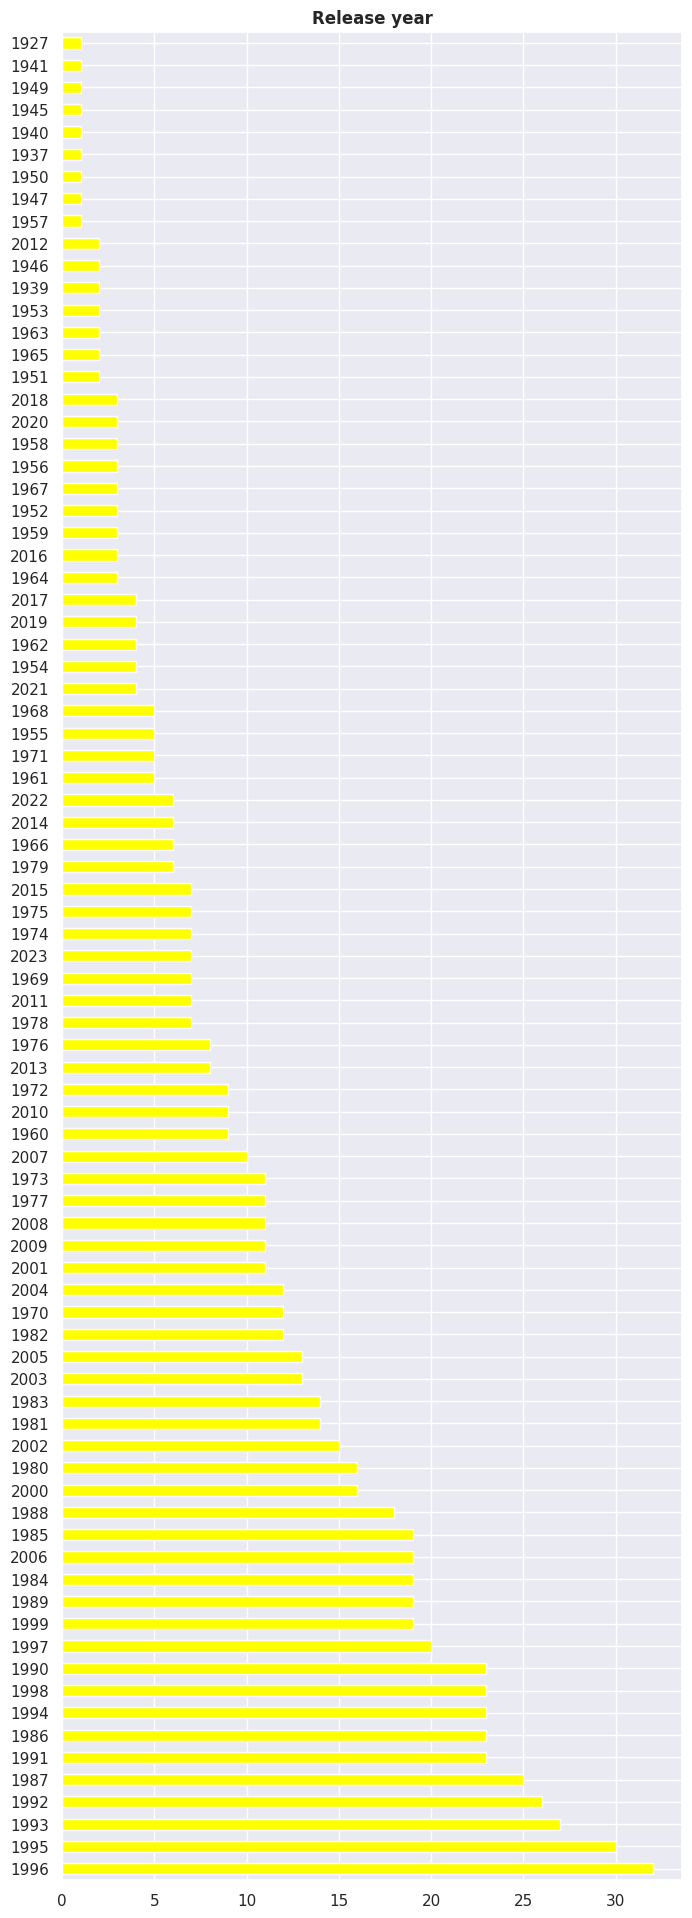

In [13]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 24))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [14]:
# Classifying the movies by decade they were release in:
def movies_by_decade(year):
  if year >= 1900 and year < 1910:
    result = '1900s'
  elif year >= 1910 and year < 1920:
    result = '1910s'
  elif year >= 1920 and year < 1930:
    result = '1920s'
  elif year >= 1930 and year < 1940:
    result = '1930s'
  elif year >= 1940 and year < 1950:
    result = '1940s'
  elif year >= 1950 and year < 1960:
    result = '1950s'
  elif year >= 1960 and year < 1970:
    result = '1960s'
  elif year >= 1970 and year < 1980:
    result = '1970s'
  elif year >= 1980 and year < 1990:
    result = '1980s'
  elif year >= 1990 and year < 2000:
    result = '1990s'
  elif year >= 2000 and year < 2010:
    result = '2000s'
  elif year >= 2010 and year < 2020:
    result = '2010s'
  elif year >= 2020 and year < 2030:
    result = '2020s'
  else:
    result = 'Unknown'
  return result

# Applying the function above on a column of the dataset and generating a new column as result:
df['Decade'] = df['Year'].apply(movies_by_decade)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade
0,2021-06-29,The Bonfire of the Vanities,movie,5.6,125,1990,"Comedy, Drama, Romance",26747,1990-12-21 00:00:00,Brian De Palma,29,6,2021,1,1990s
1,2021-07-19,Milk,movie,7.5,128,2008,"Biography, Drama, History",179869,2008-10-28 00:00:00,Gus Van Sant,19,7,2021,0,2000s
2,2022-08-25,DuckTales the Movie: Treasure of the Lost Lamp,movie,6.8,74,1990,"Animation, Adventure, Comedy, Family, Fantasy",28681,1990-08-03 00:00:00,Bob Hathcock,25,8,2022,3,1990s
3,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos,11,5,2020,0,1990s
4,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s


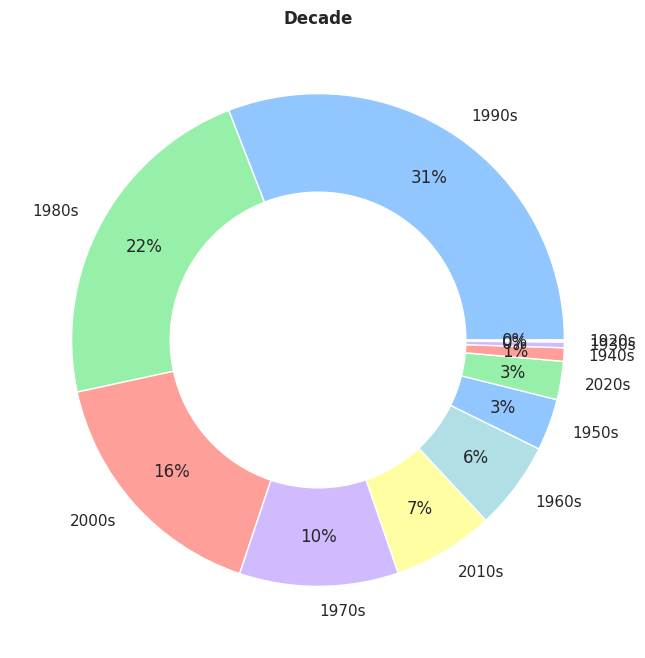

In [15]:
# Displaying the decades the movies are from:
df['Decade'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Decade', fontweight = 'bold')
plt.show()

In [16]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Regular'
  elif rating >= 4 and rating < 5:
    quality = 'Bad'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality
0,2021-06-29,The Bonfire of the Vanities,movie,5.6,125,1990,"Comedy, Drama, Romance",26747,1990-12-21 00:00:00,Brian De Palma,29,6,2021,1,1990s,Regular
1,2021-07-19,Milk,movie,7.5,128,2008,"Biography, Drama, History",179869,2008-10-28 00:00:00,Gus Van Sant,19,7,2021,0,2000s,Good
2,2022-08-25,DuckTales the Movie: Treasure of the Lost Lamp,movie,6.8,74,1990,"Animation, Adventure, Comedy, Family, Fantasy",28681,1990-08-03 00:00:00,Bob Hathcock,25,8,2022,3,1990s,Okay
3,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos,11,5,2020,0,1990s,Okay
4,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular


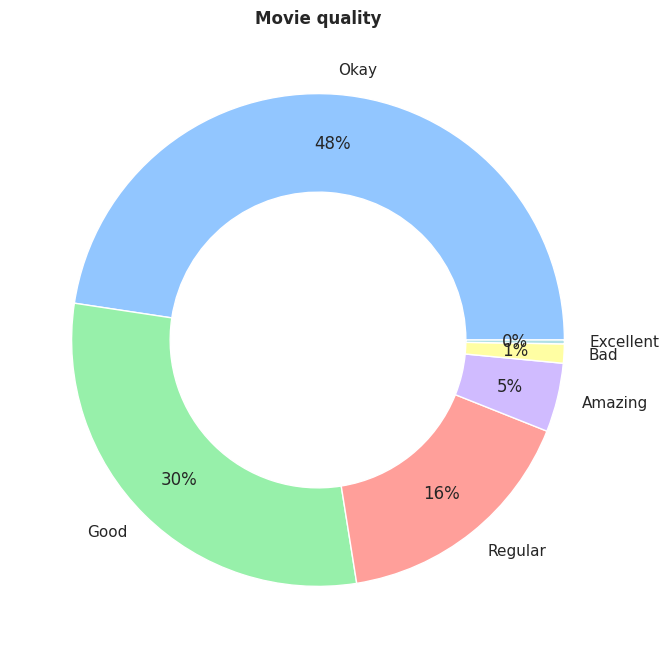

In [17]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [18]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Over 100k votes'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Over 10k votes'
  else:
    popularity = 'Less than 10k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity
0,2021-06-29,The Bonfire of the Vanities,movie,5.6,125,1990,"Comedy, Drama, Romance",26747,1990-12-21 00:00:00,Brian De Palma,29,6,2021,1,1990s,Regular,Over 10k votes
1,2021-07-19,Milk,movie,7.5,128,2008,"Biography, Drama, History",179869,2008-10-28 00:00:00,Gus Van Sant,19,7,2021,0,2000s,Good,Over 100k votes
2,2022-08-25,DuckTales the Movie: Treasure of the Lost Lamp,movie,6.8,74,1990,"Animation, Adventure, Comedy, Family, Fantasy",28681,1990-08-03 00:00:00,Bob Hathcock,25,8,2022,3,1990s,Okay,Over 10k votes
3,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos,11,5,2020,0,1990s,Okay,Less than 10k votes
4,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Over 10k votes


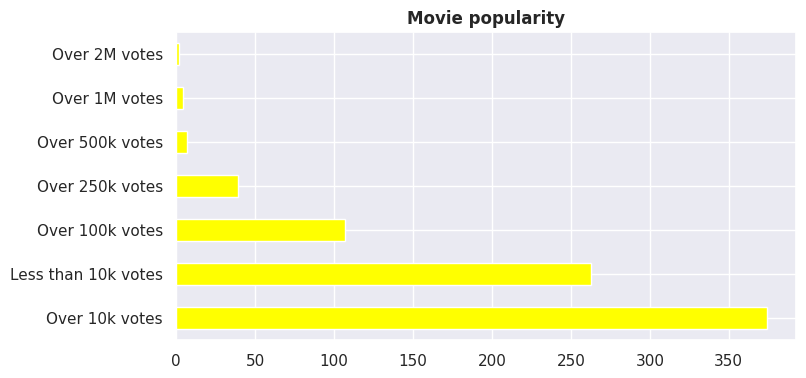

In [19]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 4))
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [20]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration
0,2021-06-29,The Bonfire of the Vanities,movie,5.6,125,1990,"Comedy, Drama, Romance",26747,1990-12-21 00:00:00,Brian De Palma,29,6,2021,1,1990s,Regular,Over 10k votes,Between 2h and 2h29
1,2021-07-19,Milk,movie,7.5,128,2008,"Biography, Drama, History",179869,2008-10-28 00:00:00,Gus Van Sant,19,7,2021,0,2000s,Good,Over 100k votes,Between 2h and 2h29
2,2022-08-25,DuckTales the Movie: Treasure of the Lost Lamp,movie,6.8,74,1990,"Animation, Adventure, Comedy, Family, Fantasy",28681,1990-08-03 00:00:00,Bob Hathcock,25,8,2022,3,1990s,Okay,Over 10k votes,Between 1h10 and 1h29
3,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos,11,5,2020,0,1990s,Okay,Less than 10k votes,Between 1h10 and 1h29
4,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Over 10k votes,Between 1h30 and 1h39


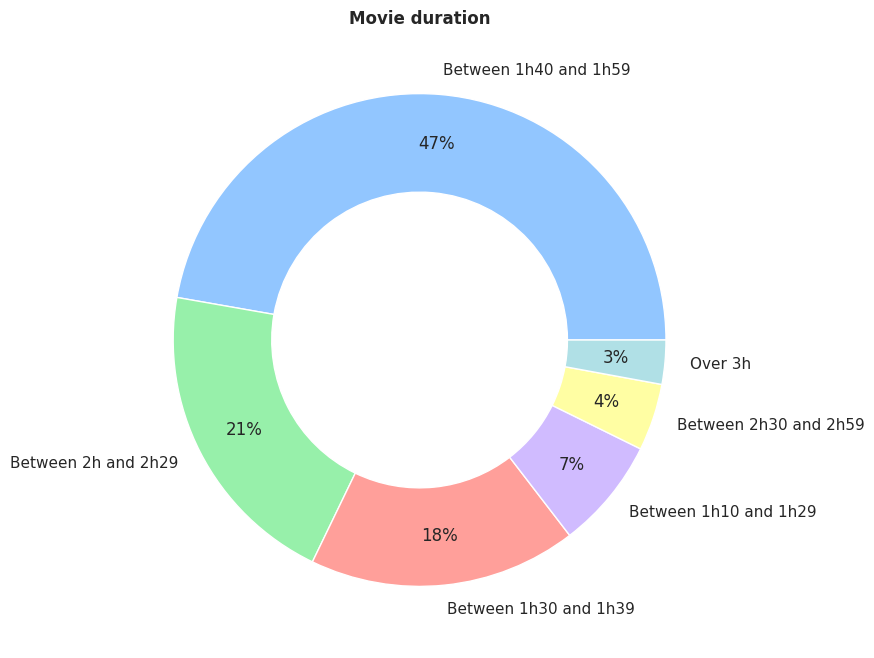

In [21]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [22]:
# Classifying the movies by year quartile added based on the month they were added to the dataset:
def year_quartile(month):
  if month >= 1 and month <= 3:
    quartile = 'First'
  elif month >= 4 and month <= 6:
    quartile = 'Second'
  elif month >= 7 and month <= 9:
    quartile = 'Third'
  else:
    quartile = 'Fourth'
  return quartile

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quartile Added'] = df['Month Created'].apply(year_quartile)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added
0,2021-06-29,The Bonfire of the Vanities,movie,5.6,125,1990,"Comedy, Drama, Romance",26747,1990-12-21 00:00:00,Brian De Palma,29,6,2021,1,1990s,Regular,Over 10k votes,Between 2h and 2h29,Second
1,2021-07-19,Milk,movie,7.5,128,2008,"Biography, Drama, History",179869,2008-10-28 00:00:00,Gus Van Sant,19,7,2021,0,2000s,Good,Over 100k votes,Between 2h and 2h29,Third
2,2022-08-25,DuckTales the Movie: Treasure of the Lost Lamp,movie,6.8,74,1990,"Animation, Adventure, Comedy, Family, Fantasy",28681,1990-08-03 00:00:00,Bob Hathcock,25,8,2022,3,1990s,Okay,Over 10k votes,Between 1h10 and 1h29,Third
3,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos,11,5,2020,0,1990s,Okay,Less than 10k votes,Between 1h10 and 1h29,Second
4,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Over 10k votes,Between 1h30 and 1h39,Second


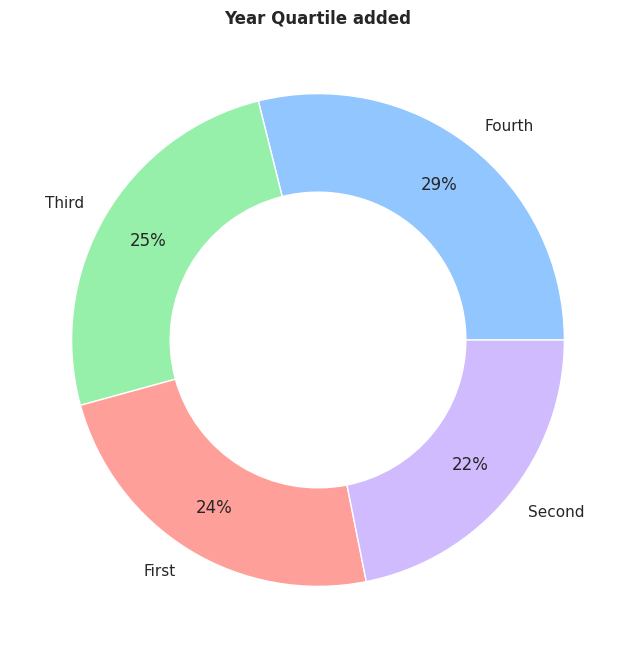

In [23]:
# Displaying the quartile the movie was added based on the algorithm above:
df['Quartile Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Year Quartile added', fontweight = 'bold')
plt.show()

In [24]:
# Classifying the movies by the month half added based on the day they were added to the dataset:
def month_half(day):
  if day >= 1 and day <= 15:
    half = 'First'
  else:
    half = 'Second'
  return half

# Applying the function above on a column of the dataset and generating a new column as result:
df['Month Half Added'] = df['Day Created'].apply(month_half)
df.head()

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Weekday Created,Decade,Quality,Movie popularity,Movie duration,Quartile Added,Month Half Added
0,2021-06-29,The Bonfire of the Vanities,movie,5.6,125,1990,"Comedy, Drama, Romance",26747,1990-12-21 00:00:00,Brian De Palma,29,6,2021,1,1990s,Regular,Over 10k votes,Between 2h and 2h29,Second,Second
1,2021-07-19,Milk,movie,7.5,128,2008,"Biography, Drama, History",179869,2008-10-28 00:00:00,Gus Van Sant,19,7,2021,0,2000s,Good,Over 100k votes,Between 2h and 2h29,Third,Second
2,2022-08-25,DuckTales the Movie: Treasure of the Lost Lamp,movie,6.8,74,1990,"Animation, Adventure, Comedy, Family, Fantasy",28681,1990-08-03 00:00:00,Bob Hathcock,25,8,2022,3,1990s,Okay,Over 10k votes,Between 1h10 and 1h29,Third,Second
3,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3282,1995-01-13 00:00:00,Phillip Borsos,11,5,2020,0,1990s,Okay,Less than 10k votes,Between 1h10 and 1h29,Second,First
4,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11667,1996-05-17 00:00:00,Alan Shapiro,11,5,2020,0,1990s,Regular,Over 10k votes,Between 1h30 and 1h39,Second,First


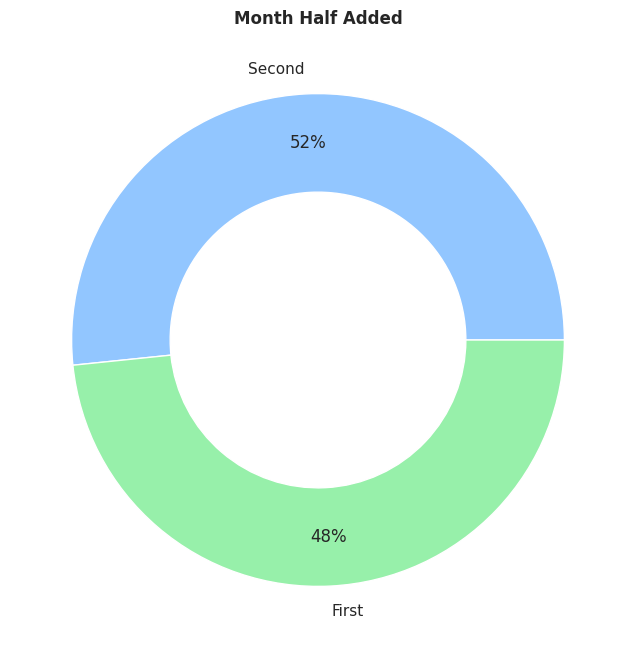

In [25]:
# Displaying the month half the movie was added based on the algorithm above:
df['Month Half Added'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', figsize = (8, 8), wedgeprops = dict(width = 0.4), pctdistance = 0.8)
plt.ylabel(None)
plt.title('Month Half Added', fontweight = 'bold')
plt.show()

In [26]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

# Splitting the genres by comma and removing leading spaces:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Genres')

# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = df.index, columns = df['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [27]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         667   129
Adventure      674   122
Animation      777    19
Biography      722    74
Comedy         519   277
Crime          645   151
Documentary    790     6
Drama          235   561
Family         713    83
Fantasy        735    61
Film-Noir      792     4
History        748    48
Horror         774    22
Music          756    40
Musical        769    27
Mystery        736    60
Romance        595   201
Sci-Fi         736    60
Sport          743    53
Thriller       641   155
War            740    56
Western        767    29


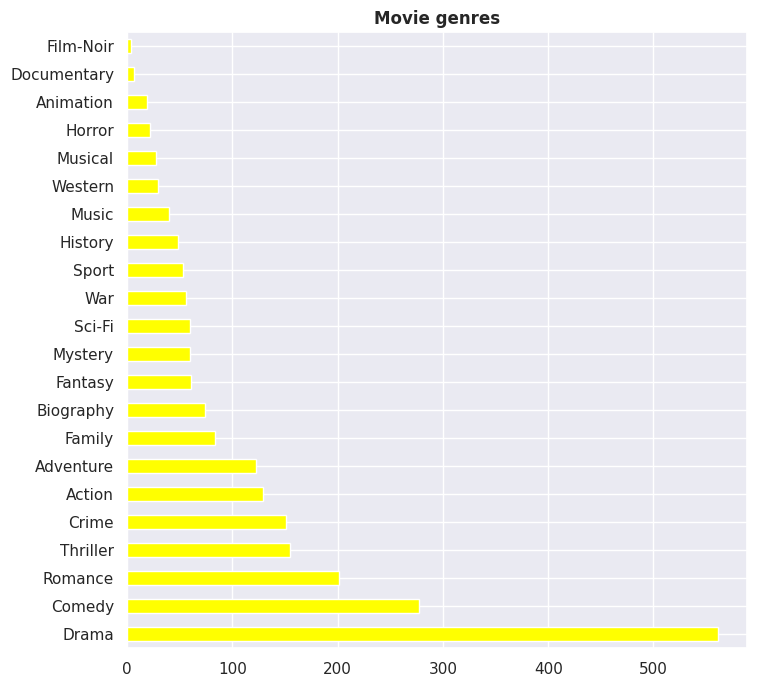

In [28]:
# Displaying the proportions of the movie genres present in the dataset:
counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 8))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()

In [29]:
df = df[df['Directors'].apply(lambda x: isinstance(x, str))]

# Splitting the directors by comma and removing leading spaces:
df['Directors'] = df['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])

# Exploding the list into separate rows:
df = df.explode('Directors')

# Counting Matrix using crosstab method:
directors_counts = pd.crosstab(index = df.index, columns = df['Directors'], margins = False).to_dict('index')
directors_counts = pd.DataFrame(directors_counts)

# Counting the number of 0s and 1s in each row:
final_directors_counts = (directors_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

<ipython-input-29-58634f6b3413>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Directors'] = df['Directors'].str.split(',').apply(lambda x : [i.strip() for i in x])


In [30]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
final_directors_counts = pd.DataFrame(final_directors_counts.tolist(), index = final_directors_counts.index, columns = ['False', 'True'])
print(final_directors_counts)

                     False  True
Adrian Lyne            790     0
Alan Parker            791     0
Alan Rudolph           791     0
Alan Shapiro           791     0
Albert Band            791     0
...                    ...   ...
Wolfgang Reitherman    789     0
Woody Allen            790     0
Yves Simoneau          791     0
Zoltan Korda           791     1
Ã‰lie Chouraqui        791     0

[601 rows x 2 columns]


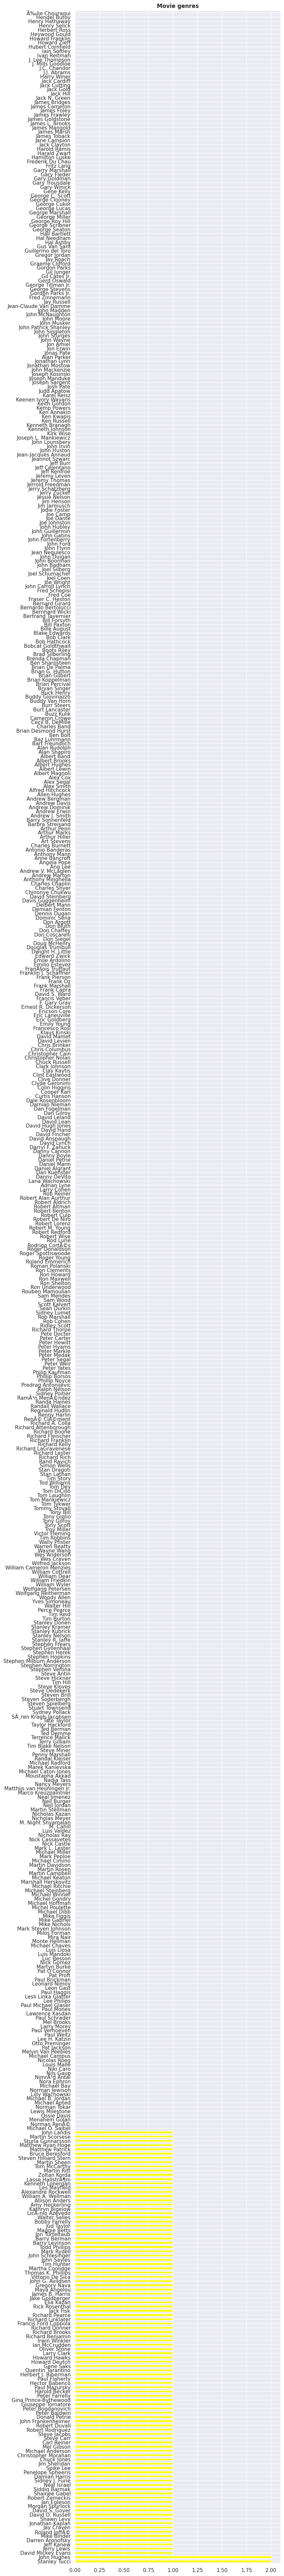

In [31]:
# Displaying the proportions of the directors present in the dataset:
final_directors_counts['True'].sort_values(ascending = False).plot(kind = 'barh', color = 'yellow', figsize = (8, 100))
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()